**Group: g16**

- anderdav@students.zhaw.ch
- goodnic1@students.zhaw.ch
- janick.rueegger@students.fhnw.ch
- neyerjoh@students.zhaw.ch

# Batchnorm Evaluation
## Exercise 2

In [4]:
# Import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + 'OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [7]:
# Load the images
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
# Preprocess the images
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [10]:
# One-hot-encode the labels
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [33]:
# Add plotting function
def plot_loss_acc(log):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(log.history['loss'], label='Training loss')
    ax1.plot(log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(log.history['accuracy'], label='Training acc')
    ax2.plot(log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()

*a) Implement a mixed CNN/ML architecture (at least 3 conv and at least 2 fully connected
hidden layers, ReLU) for classifying CIFAR10 images - without any batchnorm layers nor
regularisation. To give an example, this may look as follows : (Conv2d, ReLU, MaxPool),
(Conv2d, ReLU, MaxPool), (Linear, ReLU), (Linear,ReLU), Linear.*

In [44]:
cnn_base = Sequential()
cnn_base.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn_base.add(MaxPooling2D((2, 2)))
cnn_base.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(16, 16, 3)))
cnn_base.add(MaxPooling2D((2, 2)))
cnn_base.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 3)))
cnn_base.add(MaxPooling2D((2, 2)))
cnn_base.add(Flatten())
cnn_base.add(Dense(120, activation='relu'))
cnn_base.add(Dense(10, activation='softmax'))

cnn_base.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 128)             

*b) Train this over a suitable number of epochs until you see stable test performance or before
you observe overfitting (by using Adam with default settings). Use this as baseline and
remember train and test curves (cost, accuracy) for later reference.*

In [45]:
cnn_base.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log_base = cnn_base.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s 410us/sample - loss: 1.8507 - accuracy: 0.3206 - val_loss: 1.6648 - val_accuracy: 0.4021
Epoch 2/10
50000/50000 [==============================] - 20s 406us/sample - loss: 1.5093 - accuracy: 0.4504 - val_loss: 1.4302 - val_accuracy: 0.4832
Epoch 3/10
50000/50000 [==============================] - 20s 408us/sample - loss: 1.4049 - accuracy: 0.4923 - val_loss: 1.4043 - val_accuracy: 0.5040
Epoch 4/10
50000/50000 [==============================] - 20s 408us/sample - loss: 1.3367 - accuracy: 0.5206 - val_loss: 1.3391 - val_accuracy: 0.5236
Epoch 5/10
50000/50000 [==============================] - 20s 403us/sample - loss: 1.2854 - accuracy: 0.5420 - val_loss: 1.2602 - val_accuracy: 0.5521
Epoch 6/10
50000/50000 [==============================] - 20s 402us/sample - loss: 1.2420 - accuracy: 0.5579 - val_loss: 1.2333 - val_accuracy: 0.5638
Epoch 7/10
50000/50000 [====================

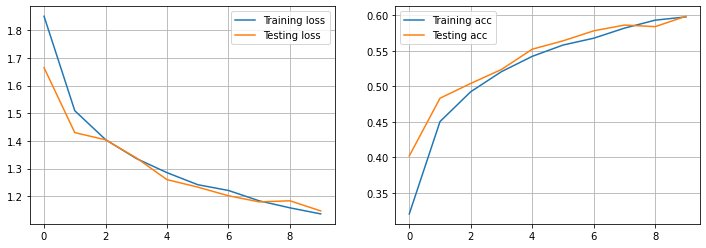

In [46]:
plot_loss_acc(log_base)

*c) Do the same (with the same number of epochs as used above), but now using tanh instead
of ReLU.*

In [47]:
cnn_tanh = Sequential()
cnn_tanh.add(Conv2D(32, (3, 3), activation='tanh', padding='same', input_shape=(32, 32, 3)))
cnn_tanh.add(MaxPooling2D((2, 2)))
cnn_tanh.add(Conv2D(16, (3, 3), activation='tanh', padding='same', input_shape=(16, 16, 3)))
cnn_tanh.add(MaxPooling2D((2, 2)))
cnn_tanh.add(Conv2D(8, (3, 3), activation='tanh', padding='same', input_shape=(8, 8, 3)))
cnn_tanh.add(MaxPooling2D((2, 2)))
cnn_tanh.add(Flatten())
cnn_tanh.add(Dense(120, activation='tanh'))
cnn_tanh.add(Dense(10, activation='softmax'))

cnn_tanh.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 128)             

In [48]:
cnn_tanh.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log_tanh = cnn_tanh.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 441us/sample - loss: 1.7931 - accuracy: 0.3590 - val_loss: 1.5391 - val_accuracy: 0.4535
Epoch 2/10
50000/50000 [==============================] - 21s 419us/sample - loss: 1.4817 - accuracy: 0.4709 - val_loss: 1.4109 - val_accuracy: 0.4959
Epoch 3/10
50000/50000 [==============================] - 21s 418us/sample - loss: 1.3633 - accuracy: 0.5131 - val_loss: 1.3263 - val_accuracy: 0.5255
Epoch 4/10
50000/50000 [==============================] - 21s 421us/sample - loss: 1.3034 - accuracy: 0.5360 - val_loss: 1.2936 - val_accuracy: 0.5407
Epoch 5/10
50000/50000 [==============================] - 20s 410us/sample - loss: 1.2609 - accuracy: 0.5509 - val_loss: 1.2440 - val_accuracy: 0.5536
Epoch 6/10
50000/50000 [==============================] - 21s 417us/sample - loss: 1.2154 - accuracy: 0.5685 - val_loss: 1.2178 - val_accuracy: 0.5636
Epoch 7/10
50000/50000 [====================

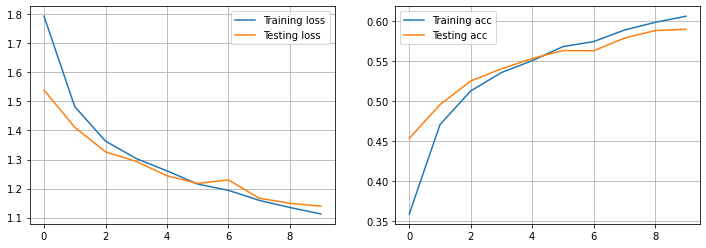

In [49]:
plot_loss_acc(log_tanh)

*d) Now add batchnorm after each Conv2d and Linear layer (before the non-linearity). Again
perform the training (over the same number of epochs). Do this twice : with ReLU and
Tanh.*

In [53]:
cnn_relu_bn = Sequential()
cnn_relu_bn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn_relu_bn.add(BatchNormalization())
cnn_relu_bn.add(MaxPooling2D((2, 2)))
cnn_relu_bn.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(16, 16, 3)))
cnn_relu_bn.add(BatchNormalization())
cnn_relu_bn.add(MaxPooling2D((2, 2)))
cnn_relu_bn.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 3)))
cnn_relu_bn.add(BatchNormalization())
cnn_relu_bn.add(MaxPooling2D((2, 2)))
cnn_relu_bn.add(Flatten())
cnn_relu_bn.add(Dense(120, activation='relu'))
cnn_relu_bn.add(BatchNormalization())
cnn_relu_bn.add(Dense(10, activation='softmax'))

cnn_relu_bn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v2_8 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
batch_normalization_v2_9 (Ba (None, 16, 16, 16)        64        
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 8, 8, 8)         

In [54]:
cnn_relu_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log_relu_bn = cnn_relu_bn.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 48s 964us/sample - loss: 1.6395 - accuracy: 0.4203 - val_loss: 2.8955 - val_accuracy: 0.1014
Epoch 2/10
50000/50000 [==============================] - 49s 973us/sample - loss: 1.2479 - accuracy: 0.5553 - val_loss: 2.4444 - val_accuracy: 0.2150
Epoch 3/10
50000/50000 [==============================] - 47s 944us/sample - loss: 1.1145 - accuracy: 0.6033 - val_loss: 1.4503 - val_accuracy: 0.4876
Epoch 4/10
50000/50000 [==============================] - 47s 940us/sample - loss: 1.0294 - accuracy: 0.6341 - val_loss: 1.1675 - val_accuracy: 0.5869
Epoch 5/10
50000/50000 [==============================] - 47s 941us/sample - loss: 0.9715 - accuracy: 0.6574 - val_loss: 1.0685 - val_accuracy: 0.6241
Epoch 6/10
50000/50000 [==============================] - 47s 939us/sample - loss: 0.9238 - accuracy: 0.6713 - val_loss: 1.6095 - val_accuracy: 0.4968
Epoch 7/10
50000/50000 [====================

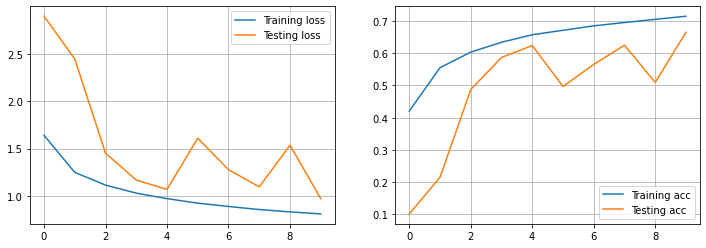

In [55]:
plot_loss_acc(log_relu_bn)

In [56]:
cnn_tanh_bn = Sequential()
cnn_tanh_bn.add(Conv2D(32, (3, 3), activation='tanh', padding='same', input_shape=(32, 32, 3)))
cnn_tanh_bn.add(BatchNormalization())
cnn_tanh_bn.add(MaxPooling2D((2, 2)))
cnn_tanh_bn.add(Conv2D(16, (3, 3), activation='tanh', padding='same', input_shape=(16, 16, 3)))
cnn_tanh_bn.add(BatchNormalization())
cnn_tanh_bn.add(MaxPooling2D((2, 2)))
cnn_tanh_bn.add(Conv2D(8, (3, 3), activation='tanh', padding='same', input_shape=(8, 8, 3)))
cnn_tanh_bn.add(BatchNormalization())
cnn_tanh_bn.add(MaxPooling2D((2, 2)))
cnn_tanh_bn.add(Flatten())
cnn_tanh_bn.add(Dense(120, activation='tanh'))
cnn_tanh_bn.add(BatchNormalization())
cnn_tanh_bn.add(Dense(10, activation='softmax'))

cnn_tanh_bn.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v2_12 (B (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
batch_normalization_v2_13 (B (None, 16, 16, 16)        64        
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 8, 8, 8)         

In [57]:
cnn_tanh_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log_tanh_bn = cnn_tanh_bn.fit(X_train, Y_train, batch_size=256, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.6456 - accuracy: 0.4187 - val_loss: 3.7037 - val_accuracy: 0.1054
Epoch 2/10
50000/50000 [==============================] - 49s 983us/sample - loss: 1.3135 - accuracy: 0.5321 - val_loss: 2.9985 - val_accuracy: 0.2162
Epoch 3/10
50000/50000 [==============================] - 48s 966us/sample - loss: 1.1872 - accuracy: 0.5782 - val_loss: 1.9711 - val_accuracy: 0.3616
Epoch 4/10
50000/50000 [==============================] - 48s 967us/sample - loss: 1.1119 - accuracy: 0.6045 - val_loss: 1.4340 - val_accuracy: 0.4973
Epoch 5/10
50000/50000 [==============================] - 49s 974us/sample - loss: 1.0496 - accuracy: 0.6286 - val_loss: 1.3430 - val_accuracy: 0.5357
Epoch 6/10
50000/50000 [==============================] - 48s 965us/sample - loss: 1.0060 - accuracy: 0.6429 - val_loss: 1.1516 - val_accuracy: 0.5967
Epoch 7/10
50000/50000 [======================

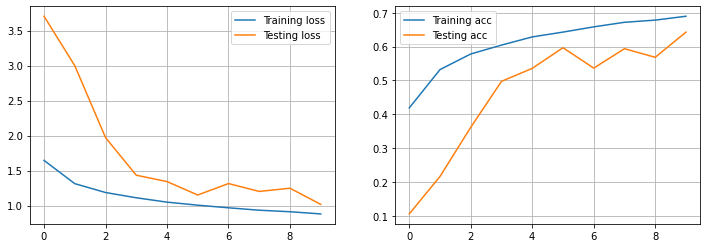

In [64]:
plot_loss_acc(log_tanh_bn)

*e) Now study the impact when adding dropout regularisation before each fully connected
layer (not CNN). Do this for the architecture without and with batchnorm. Perform
according trainings. How far can you bring up the test accuracy by continuing the training
possibly over more epochs?*

In [61]:
cnn_tanh_bn_dpo = Sequential()
cnn_tanh_bn_dpo.add(Conv2D(32, (3, 3), activation='tanh', padding='same', input_shape=(32, 32, 3)))
cnn_tanh_bn_dpo.add(BatchNormalization())
cnn_tanh_bn_dpo.add(MaxPooling2D((2, 2)))
cnn_tanh_bn_dpo.add(Conv2D(16, (3, 3), activation='tanh', padding='same', input_shape=(16, 16, 3)))
cnn_tanh_bn_dpo.add(BatchNormalization())
cnn_tanh_bn_dpo.add(MaxPooling2D((2, 2)))
cnn_tanh_bn_dpo.add(Conv2D(8, (3, 3), activation='tanh', padding='same', input_shape=(8, 8, 3)))
cnn_tanh_bn_dpo.add(BatchNormalization())
cnn_tanh_bn_dpo.add(MaxPooling2D((2, 2)))
cnn_tanh_bn_dpo.add(Flatten())
cnn_tanh_bn_dpo.add(Dropout(.2))
cnn_tanh_bn_dpo.add(Dense(120, activation='tanh'))
cnn_tanh_bn_dpo.add(BatchNormalization())
cnn_tanh_bn_dpo.add(Dropout(.2))
cnn_tanh_bn_dpo.add(Dense(10, activation='softmax'))

cnn_tanh_bn_dpo.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v2_20 (B (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
batch_normalization_v2_21 (B (None, 16, 16, 16)        64        
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 8)         

In [62]:
cnn_tanh_bn_dpo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log_tanh_bn_dpo = cnn_tanh_bn_dpo.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 49s 972us/sample - loss: 1.8643 - accuracy: 0.3485 - val_loss: 3.7528 - val_accuracy: 0.1079
Epoch 2/20
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.4899 - accuracy: 0.4631 - val_loss: 2.2187 - val_accuracy: 0.2902
Epoch 3/20
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.3691 - accuracy: 0.5069 - val_loss: 1.9319 - val_accuracy: 0.3620
Epoch 4/20
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.2987 - accuracy: 0.5330 - val_loss: 1.2160 - val_accuracy: 0.5715
Epoch 5/20
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.2349 - accuracy: 0.5581 - val_loss: 1.1828 - val_accuracy: 0.5771
Epoch 6/20
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.1921 - accuracy: 0.5728 - val_loss: 1.2752 - val_accuracy: 0.5453
Epoch 7/20
50000/50000 [==============================

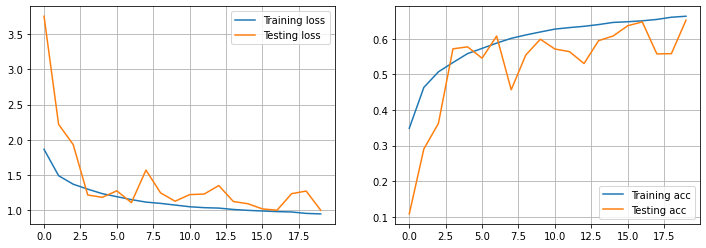

In [63]:
plot_loss_acc(log_tanh_bn_dpo)

In [83]:
cnn_tanh_bn_dpo_2 = Sequential()
cnn_tanh_bn_dpo_2.add(Conv2D(32, (3, 3), activation='tanh', padding='same', input_shape=(32, 32, 3)))
cnn_tanh_bn_dpo_2.add(BatchNormalization())
cnn_tanh_bn_dpo_2.add(MaxPooling2D((2, 2)))
cnn_tanh_bn_dpo_2.add(Conv2D(16, (3, 3), activation='tanh', padding='same', input_shape=(16, 16, 3)))
cnn_tanh_bn_dpo_2.add(BatchNormalization())
cnn_tanh_bn_dpo_2.add(MaxPooling2D((2, 2)))
cnn_tanh_bn_dpo_2.add(Conv2D(8, (3, 3), activation='tanh', padding='same', input_shape=(8, 8, 3)))
cnn_tanh_bn_dpo_2.add(BatchNormalization())
cnn_tanh_bn_dpo_2.add(MaxPooling2D((2, 2)))
cnn_tanh_bn_dpo_2.add(Flatten())
cnn_tanh_bn_dpo_2.add(Dropout(.1))
cnn_tanh_bn_dpo_2.add(Dense(120, activation='tanh'))
cnn_tanh_bn_dpo_2.add(BatchNormalization())
cnn_tanh_bn_dpo_2.add(Dropout(.1))
cnn_tanh_bn_dpo_2.add(Dense(10, activation='softmax'))

cnn_tanh_bn_dpo_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v2_28 (B (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
batch_normalization_v2_29 (B (None, 16, 16, 16)        64        
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 8, 8, 8)         

In [84]:
cnn_tanh_bn_dpo_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log_tanh_bn_dpo_2 = cnn_tanh_bn_dpo_2.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 50s 997us/sample - loss: 1.7716 - accuracy: 0.3796 - val_loss: 3.9229 - val_accuracy: 0.1204
Epoch 2/20
50000/50000 [==============================] - 50s 993us/sample - loss: 1.4147 - accuracy: 0.4890 - val_loss: 2.3857 - val_accuracy: 0.2586
Epoch 3/20
50000/50000 [==============================] - 48s 969us/sample - loss: 1.3008 - accuracy: 0.5310 - val_loss: 1.5486 - val_accuracy: 0.4618
Epoch 4/20
50000/50000 [==============================] - 49s 976us/sample - loss: 1.2211 - accuracy: 0.5607 - val_loss: 1.3171 - val_accuracy: 0.5309
Epoch 5/20
50000/50000 [==============================] - 49s 981us/sample - loss: 1.1507 - accuracy: 0.5882 - val_loss: 2.1493 - val_accuracy: 0.3297
Epoch 6/20
50000/50000 [==============================] - 48s 962us/sample - loss: 1.1040 - accuracy: 0.6063 - val_loss: 1.9451 - val_accuracy: 0.3611
Epoch 7/20
50000/50000 [====================

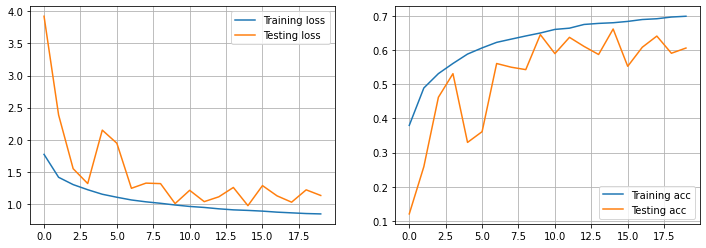

In [85]:
plot_loss_acc(log_tanh_bn_dpo_2)

*f) Create one or several comparisons plots with the learning curves with/without batchnorm
also under the different other settings : with/without regularisation and with ReLU or
Tanh. Estimate a factor of speedup when using batchnorm (with/without reg, with ReLU
or Tanh). Discuss your findings and make a statement about whether the results are as
you expect.*

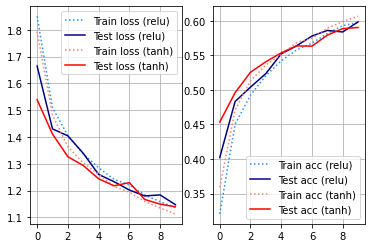

In [75]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_base.history['loss'], label='Train loss (relu)', color='dodgerblue', linestyle='dotted')
ax1.plot(log_base.history['val_loss'], label='Test loss (relu)', color='navy', linestyle='solid')
ax1.plot(log_tanh.history['loss'], label='Train loss (tanh)', color='salmon', linestyle='dotted')
ax1.plot(log_tanh.history['val_loss'], label='Test loss (tanh)', color='red', linestyle='solid')
ax1.legend()
ax1.grid()
ax2.plot(log_base.history['accuracy'], label='Train acc (relu)', color='dodgerblue', linestyle='dotted')
ax2.plot(log_base.history['val_accuracy'], label='Test acc (relu)', color='navy', linestyle='solid')
ax2.plot(log_tanh.history['accuracy'], label='Train acc (tanh)', color='salmon', linestyle='dotted')
ax2.plot(log_tanh.history['val_accuracy'], label='Test acc (tanh)', color='red', linestyle='solid')
ax2.legend()
ax2.grid()

The difference between `relu` and `tanh` in `test` had been minimal, considering `epochs=10`. The main difference is that `tanh` seems to learn a notch faster, but `relu` catches up in `epochs=5`. In `train` losses and accuracy, `tanh` seems to perform slightly better, but also only minimal.

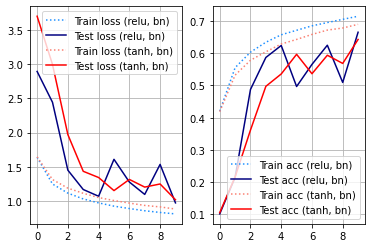

In [77]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_relu_bn.history['loss'], label='Train loss (relu, bn)', color='dodgerblue', linestyle='dotted')
ax1.plot(log_relu_bn.history['val_loss'], label='Test loss (relu, bn)', color='navy', linestyle='solid')
ax1.plot(log_tanh_bn.history['loss'], label='Train loss (tanh, bn)', color='salmon', linestyle='dotted')
ax1.plot(log_tanh_bn.history['val_loss'], label='Test loss (tanh, bn)', color='red', linestyle='solid')
ax1.legend()
ax1.grid()
ax2.plot(log_relu_bn.history['accuracy'], label='Train acc (relu, bn)', color='dodgerblue', linestyle='dotted')
ax2.plot(log_relu_bn.history['val_accuracy'], label='Test acc (relu, bn)', color='navy', linestyle='solid')
ax2.plot(log_tanh_bn.history['accuracy'], label='Train acc (tanh, bn)', color='salmon', linestyle='dotted')
ax2.plot(log_tanh_bn.history['val_accuracy'], label='Test acc (tanh, bn)', color='red', linestyle='solid')
ax2.legend()
ax2.grid()

When applying `BatchNormalization` layers, both `relu` and `tanh` curves indicate a more unstable learning. In general, however, `tanh` seems to be more stable for losses and accuracy. `relu` seems to be a bit faster in learning. The results are about equal, however, for `epochs=10`.

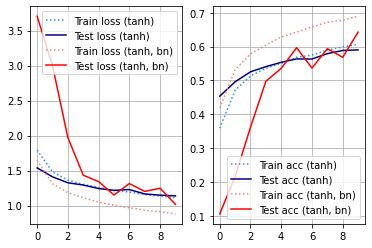

In [80]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_tanh.history['loss'], label='Train loss (tanh)', color='dodgerblue', linestyle='dotted')
ax1.plot(log_tanh.history['val_loss'], label='Test loss (tanh)', color='navy', linestyle='solid')
ax1.plot(log_tanh_bn.history['loss'], label='Train loss (tanh, bn)', color='salmon', linestyle='dotted')
ax1.plot(log_tanh_bn.history['val_loss'], label='Test loss (tanh, bn)', color='red', linestyle='solid')
ax1.legend()
ax1.grid()
ax2.plot(log_tanh.history['accuracy'], label='Train acc (tanh)', color='dodgerblue', linestyle='dotted')
ax2.plot(log_tanh.history['val_accuracy'], label='Test acc (tanh)', color='navy', linestyle='solid')
ax2.plot(log_tanh_bn.history['accuracy'], label='Train acc (tanh, bn)', color='salmon', linestyle='dotted')
ax2.plot(log_tanh_bn.history['val_accuracy'], label='Test acc (tanh, bn)', color='red', linestyle='solid')
ax2.legend()
ax2.grid()

Learning without `BatchNormalization` seems to be faster until `epochs=5`, after that, better results are achieve by activating it.

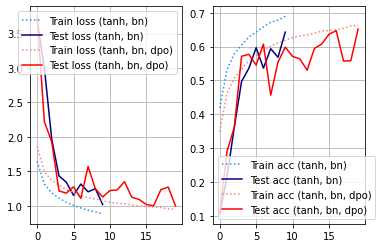

In [81]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_tanh_bn.history['loss'], label='Train loss (tanh, bn)', color='dodgerblue', linestyle='dotted')
ax1.plot(log_tanh_bn.history['val_loss'], label='Test loss (tanh, bn)', color='navy', linestyle='solid')
ax1.plot(log_tanh_bn_dpo.history['loss'], label='Train loss (tanh, bn, dpo)', color='salmon', linestyle='dotted')
ax1.plot(log_tanh_bn_dpo.history['val_loss'], label='Test loss (tanh, bn, dpo)', color='red', linestyle='solid')
ax1.legend()
ax1.grid()
ax2.plot(log_tanh_bn.history['accuracy'], label='Train acc (tanh, bn)', color='dodgerblue', linestyle='dotted')
ax2.plot(log_tanh_bn.history['val_accuracy'], label='Test acc (tanh, bn)', color='navy', linestyle='solid')
ax2.plot(log_tanh_bn_dpo.history['accuracy'], label='Train acc (tanh, bn, dpo)', color='salmon', linestyle='dotted')
ax2.plot(log_tanh_bn_dpo.history['val_accuracy'], label='Test acc (tanh, bn, dpo)', color='red', linestyle='solid')
ax2.legend()
ax2.grid()

We could not significantly improve our results in losses and accuracy when additionally to the `BatchNormalization`, a `Dropout` was applied. The learning itself got pretty unstable and we needed `2x` the epochs to get to the same results. But we thinks, it might be because the `DropoutRate` was to high.

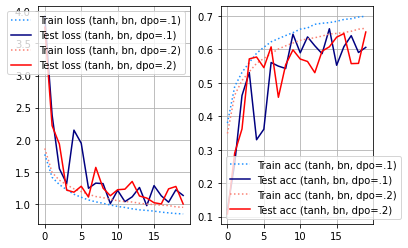

In [86]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log_tanh_bn_dpo_2.history['loss'], label='Train loss (tanh, bn, dpo=.1)', color='dodgerblue', linestyle='dotted')
ax1.plot(log_tanh_bn_dpo_2.history['val_loss'], label='Test loss (tanh, bn, dpo=.1)', color='navy', linestyle='solid')
ax1.plot(log_tanh_bn_dpo.history['loss'], label='Train loss (tanh, bn, dpo=.2)', color='salmon', linestyle='dotted')
ax1.plot(log_tanh_bn_dpo.history['val_loss'], label='Test loss (tanh, bn, dpo=.2)', color='red', linestyle='solid')
ax1.legend()
ax1.grid()
ax2.plot(log_tanh_bn_dpo_2.history['accuracy'], label='Train acc (tanh, bn, dpo=.1)', color='dodgerblue', linestyle='dotted')
ax2.plot(log_tanh_bn_dpo_2.history['val_accuracy'], label='Test acc (tanh, bn, dpo=.1)', color='navy', linestyle='solid')
ax2.plot(log_tanh_bn_dpo.history['accuracy'], label='Train acc (tanh, bn, dpo=.2)', color='salmon', linestyle='dotted')
ax2.plot(log_tanh_bn_dpo.history['val_accuracy'], label='Test acc (tanh, bn, dpo=.2)', color='red', linestyle='solid')
ax2.legend()
ax2.grid()

Thus, we created an additional experiment, where we used the same model as before, but reduce the `DropoutRate` to `0.1` instead of `0.2` - we wanted to see if this makes the learning more stable and if the model generalizes better over `epochs=20`. Unfortunately, as can be seen, we could neither improve the stability, nor the results.